In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [45]:
path = 'ex3data1.mat'
data = loadmat(path)
X = data['X']
y = data['y']

In [46]:
print(np.unique(y)) # 返回无重复的列表或元组
X.shape, y.shape # X中，一共5000个样本，每个样本20x20=400的像素，占用一行

[ 1  2  3  4  5  6  7  8  9 10]


((5000, 400), (5000, 1))

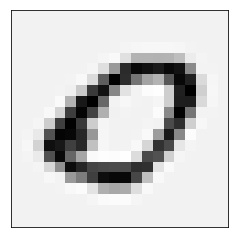

In [47]:
image = X[0]
fig, ax = plt.subplots()
ax.matshow(image.reshape(20, 20), cmap = 'gray_r') # matshow 将矩阵画出来
plt.xticks([])
plt.yticks([]) # 去除画面四周的刻度
plt.show()

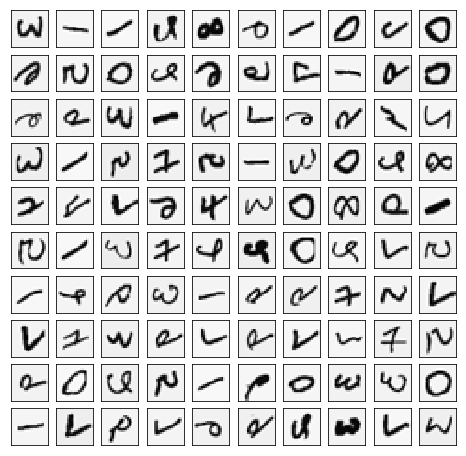

In [48]:
def plot100Sample():
    sampleIndex = np.random.choice(np.arange(X.shape[0]), 100)
    sample = X[sampleIndex] # numpy的用法 快速选出样本
    fig, ax = plt.subplots(nrows = 10, ncols = 10, sharex = True, sharey = True, figsize = (8, 8))
    # sharex, sharey 设置为True，共享x轴和y轴
    for i in range(10):
        for j in range(10):
            temp = sample[10 * i + j]
            ax[i, j].matshow(temp.reshape(20, 20), cmap = 'gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()
plot100Sample()

In [49]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [50]:
def cost(theta, X, y):
    first = -y * np.log(sigmoid(X@theta))
    second = -(1-y) * np.log(1 - sigmoid(X@theta))
    return np.mean(first + second)

In [51]:
def costReg(theta, X, y, l = 1):
    _theta = theta[1: ]
    reg = l / (2 * len(X)) * np.sum(np.power(_theta, 2))
    return cost(theta, X, y) + reg

In [52]:
def gradient(theta, X, y):
    return X.T @ (sigmoid(X@theta) - y) / len(X)

In [53]:
def gradientReg(theta, X, y, l = 1):
    reg = l / len(X) * theta
    reg[0] = 0
    return gradient(theta, X, y) + reg

In [54]:
X = np.insert(X, 0, 1, axis = 1) # 插入一列1
y = y.flatten()
X.shape, y.shape

((5000, 401), (5000,))

In [63]:
from scipy.optimize import minimize
def one_vs_all(X, y, l, K):
    all_theta = np.zeros((K, X.shape[1]))
    for i in range(1, K + 1):
        theta  = np.zeros(X.shape[1])
        y_i = np.array([1 if label == i else 0 for label in y])
        result = minimize(fun = costReg, x0 = theta, args = (X, y_i, l), method = 'TNC', jac = gradientReg, options = {'disp': True})
        all_theta[i - 1] = result.x
    return all_theta

In [64]:
all_theta = one_vs_all(X, y, 1, 10)

In [70]:
def predict(X, theta):
    prob = X @ theta.T
    return np.argmax(prob, axis = 1) + 1

In [71]:
y_predict = predict(X, all_theta)

In [72]:
accuracy = np.mean(y_predict == y)

In [73]:
accuracy

0.9446